![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Reinforcement Learning
# Assignment 4 with Solution



## Introduction
Welcome to the fourth RL assignment.  
Last assignment you've approximated the value function. However, there is another way to go: **the approximation of the policy**.
The **Policy gradient** is a way to implement that. It is not by itself an easy concept to grasp and, additionally, applies neural network concepts to solve reinforcement learning problems.
For that reason, this assignment is meant to guide you lightly in the process of putting all these concepts together, step by step, until we can put all the building blocks together and run an interesting example of application of policy gradient.
In case you are not familiar with neural networks, we present a quick introduction, so you can implement the related functions.


## Resources
I've always found experience the best teacher, so I advocate just diving in and trying to implement things.  However, it is always good to have other sources to reference, so every week I'll place links to things that I think are helpful to learn the material.
* [Chapter 13 of this book](http://incompleteideas.net/book/bookdraft2018jan1.pdf) about Policy Gradient Methods is nice.
* [Reinforcement Learning in a Nutshell](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.69.9557&rep=rep1&type=pdf) is another nice reference for Policy Gradient Learning.

## The Problem
We are given the following:
+ A sequence of images (frames) representing each frame of the Pong game.
+ An indication when we’ve won or lost the game.
+ An opponent agent that is the traditional Pong computer player.
+ An agent that we control and can tell to move up or down in each frame.

If you are not familiar with this old game, the frames below can give you an idea:
<table><tr>
         <td><img src="../images/RL-assign4-9.png" alt="Drawing" style="width: 200px;"/></td>
         <td><img src="../images/RL-assign4-10.png" alt="Drawing" style="width: 200px;"/></td>
         <td><img src="../images/RL-assign4-11.png" alt="Drawing" style="width: 200px;"/></td>
    </tr></table>

## The Solution
You are going to apply the **Policy Gradient** associated with a neural network (a Multi Layer Perceptron) to solve this problem.
The Neural Network takes in each image and outputs a command to our AI to move up or down.

Below is the general algorithm that you are going to implement to solve this problem:
1. Take in images from the game and preprocess them (remove color, background, downsample etc.). We have done this for you!
2. Use the Neural Network to compute a probability of moving up.
3. Sample from that probability distribution and tell the agent to move up or down.
4. If the round is over (you missed the ball or the opponent missed the ball), find whether you won or lost.
5. When the episode has finished (someone got to 21 points), pass the result through the backpropagation algorithm to compute the gradient for our weights.
6. After 10 episodes have finished, sum up the gradient and move the weights in the direction of the gradient.
7. Repeat this process until our weights are tuned to the point where we can beat the computer. 

# First some Concepts
Before you begin, here we are presenting the basic concepts.

## Neural Network: Multi Layer Perceptron
This is the simple neural network that you are going to implement here. <br/>
A perceptron is a linear classifier; that is, it is an algorithm that classifies input by separating the two categories with a straight line. <br/>
Input is typically a **feature vector x** multiplied by **weights w** and added to a **bias b**:<br/>

$y = w * x + b$.

The multilayer perceptron is the hello world of deep learning: a good place to start when you are learning about deep learning.

A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP. MLPs with one hidden layer are capable of approximating any continuous function.

Training involves adjusting the parameters, or the weights and biases, of the model in order to minimize error, expressed by a **loss function**. <br/>
**Backpropagation** is used to make those weigh and bias adjustments relative to the error, and the error itself can be measured in a variety of ways, including by root mean squared error (RMSE).

Feedforward networks such as MLPs are like tennis, or ping pong. They are mainly involved in two motions, a constant back and forth. You can think of this ping pong of guesses and answers as a kind of accelerated science, since each guess is a test of what we think we know, and each response is feedback letting us know how wrong we are.

In the **forward pass**, the signal flow moves from the input layer through the hidden layers to the output layer, and the decision of the output layer is measured against the ground truth labels.

In the **backward pass**, using backpropagation and the chain rule of calculus, partial derivatives of the error function w.r.t. the various weights and biases are back-propagated through the MLP. That act of differentiation gives us a **gradient**, or a landscape of error, along which the parameters that may be adjusted as they move the MLP one step closer to the error minimum. This can be done with any gradient-based optimisation algorithm such as stochastic gradient descent. The network keeps playing that game of tennis until the error can go no lower. This state is known as convergence.

If you have noticed, our dense layer only have linear functions, and any combination of linear function only results in the linear output. As we want our MLP to be flexible and learn non-linear decision boundaries, we also need to introduce **non-linearity** into the network. We achieve the task of introducing non-linearity by adding **activation functions**. There are various kinds of activation function which can be used, but we will be implementing **Rectified Linear Units (ReLu)** which is one of the popular activation functions. 

### ReLu function
ReLU function is a simple function which is zero for any input value below zero and the same value for values greater than zero.

$f(x) = max(0,x)$

### The log probability
Now that we understand dense layer and also understand the purpose of activation function, the only thing left is training the network. For training a neural network, we need to have a **loss function** and every layer should have a **feed-forward loop** and **backpropagation loop**.
Actually, we are computing our gradient during this backpropagation loop.

**Feedforward loop** takes an input and generates output for making a prediction and **backpropagation loop** helps in training the model by adjusting weights in the layer to lower the output loss.

The diagram below exemplify the use of the log probability function appliyed to our supervised learning problem.<br/>
In ordinary supervised learning we would feed an image to the network and get some probabilities, e.g. for two classes UP and DOWN. 
The figure shows the log probabilities (-1.2, -0.36) for UP and DOWN instead of the raw probabilities (30% and 70% in this case), because we always optimize the log probability of the correct label. <br/>
Now, in supervised learning we would have access to a label. For example, we might be told that the correct thing to do right now is to go UP (label 0). In an implementation we would enter gradient of 1.0 on the log probability of UP and run backprop to compute the gradient vector:

$\nabla_w log(y = UP|x)$

This gradient would tell us how we should change every one of our million parameters to make the network slightly more likely to predict UP. For example, one of the million parameters in the network might have a gradient of -2.1, which means that if we were to increase that parameter by a small positive amount (e.g. 0.001), the log probability of UP would decrease by 2.1 * 0.001 (decrease due to the negative sign). If we then did a parameter update, our network would now be slightly more likely to predict UP when it sees a very similar image in the future.

<img src="../images/RL-assign4-5.png" alt="Drawing" style="width: 500px;"/>


### The Sigmoig Function
We are going to use another activation function here. The sigmoid function.
The sigmoid non-linearity has the mathematical form:

$\sigma(x) = 1 / (1 - e^{-x})$

It takes a real-valued number and “squashes” it into a range between 0 and 1. In particular, large negative numbers become 0 and large positive numbers become 1.<br/> 
For our Pong problem, we are going to output the probability of an UP action.

## Policy Gradients. 
Remember that we don't have actual labels for our supervised learning approach, so what do we do?<br/>
Here is the **Policy Gradients solution**.
Let's look at an example below to ilustrate it. <br/>
Our policy network calculated probability of going UP as 30% (logprob -1.2) and DOWN as 70% (logprob -0.36). We will now sample an action from this distribution; E.g. suppose we sample DOWN, and we will execute it in the game. At this point notice one interesting fact: We could immediately fill in a gradient of 1.0 for DOWN as we did in supervised learning, and find the gradient vector that would encourage the network to be slightly more likely to do the DOWN action in the future. So we can immediately evaluate this gradient and that’s great, but the problem is that at least for now we do not yet know if going DOWN is good. <br/>
But the critical point is that that’s okay, because we can simply wait a bit and see! For example in Pong we could wait until the end of the game, then take the reward we get (either +1 if we won or -1 if we lost), and enter that scalar as the gradient for the action we have taken (DOWN in this case). In the example below, going DOWN ended up to us losing the game (-1 reward). So if we fill in -1 for log probability of DOWN and do backprop we will find a gradient that discourages the network to take the DOWN action for that input in the future (and rightly so, since taking that action led to us losing the game).
<img src="../images/RL-assign4-1.png" alt="Drawing" style="width: 500px;"/>

Now, we have a stochastic policy that samples actions and then actions that happen to eventually lead to good outcomes get encouraged in the future, and actions taken that lead to bad outcomes get discouraged. Also, the reward does not even need to be +1 or -1 if we win the game eventually. <br/>
It can be an arbitrary measure of some kind of eventual quality. For example if things turn out really well it could be 10.0, which we would then enter as the gradient instead of -1 to start off backprop. 

### Training protocol. 
So here is how the training will work in detail. <br/>
We will initialize the policy network with some W1, W2 and play 100 games of Pong (we call these policy “rollouts”). Lets assume that each game is made up of 200 frames so in total we’ve made 20,000 decisions for going UP or DOWN and for each one of these we know the parameter gradient, which tells us how we should change the parameters if we wanted to encourage that decision in that state in the future. <br/>
All that remains now is to label every decision we’ve made as good or bad. For example suppose we won 12 games and lost 88. We’ll take all **200x12** = 2400 decisions we made in the winning games and do a positive update (filling in a +1.0 in the gradient for the sampled action, doing backprop, and parameter update encouraging the actions we picked in all those states). And we’ll take the other **200x88** = 17600 decisions we made in the losing games and do a negative update (discouraging whatever we did). <br/>
The network will now become slightly more likely to repeat actions that worked, and slightly less likely to repeat actions that didn’t work. Now we play another 100 games with our new, slightly improved policy and rinse and repeat.
<img src="../images/RL-assign4-2.png" alt="Drawing" style="width: 500px;"/>

### Installing the packages
We are going to use OpenAI Gym to make a game environment. <br/>
For that, first lt's install the needed packages.
Uncomment the code below and run it the first time you run this notebook or any time you start your SageMaker instance (you can comment this code after the first time you run it).

In [1]:
!pip install gym

In [2]:
!pip install gym[atari]

In [3]:
import gym
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

### Preprossing the Frames
The first step to our algorithm is processing the image of the game that OpenAI Gym passed us. 
We really don’t care about the entire image - just certain details.
The function below does that for us.

In [4]:
def downsample(image):
    # Take only alternate pixels - basically halves the resolution of the image (which is fine for us)
    return image[::2, ::2, :]

In [5]:
def remove_color(image):
    """Convert all color (RGB is the third dimension in the image)"""
    return image[:, :, 0]

In [6]:
def remove_background(image):
    image[image == 144] = 0
    image[image == 109] = 0
    return image

In [7]:
def preprocess_observations(input_observation):
    """ convert the 210x160x3 uint8 frame into a 6400 float vector """
    processed_observation = input_observation[35:195] # crop
    processed_observation = downsample(processed_observation)
    processed_observation = remove_color(processed_observation)
    processed_observation = remove_background(processed_observation)
    processed_observation[processed_observation != 0] = 1 # everything else (paddles, ball) just set to 1    
    # Convert from 80 x 80 matrix to 1600 x 1 matrix
    processed_observation = processed_observation.astype(np.float).ravel()

    return processed_observation

## PART 1 - How to move
In this first part, we are going to figure out how to move in our environment.

## Question 1
Now that you have all the concepts, let's start with the first building blocks for our policy gradient approach. 
+ Create the function to **apply neuron network** forward pass.
+ Create the function to compute **sigmoid**
+ create the **relu** function 
For that, follow the orientation below.

#### Orientation
Your **neural network function** will implement the **forward pass** of the Neural Network, taking observations and weights and generating a probability of going up. <br/>
Follow the steps below:
1. Compute the unprocessed hidden layer values by simply finding the dot product of the weights[1] (weights of layer 1) and the observation_matrix. If you remember, weights[1] is a 200 x 6400 matrix and observations_matrix is a 6400 x 1 matrix. So the dot product will give us a matrix of dimensions 200 x 1. We have 200 neurons so each row represents the output of one neuron. 
2. Next, create a **relu function** to apply a nonlinear thresholding function on those hidden layer values - in this case just a simple ReLU. At a high level, this introduces the nonlinearities that makes our network capable of computing nonlinear functions rather than just simple linear ones.

$$f(x) = max(0,x)$$

3. Use the hidden layer activation values returned by the **relu function** to calculate the output layer values. This is done by a simple dot product of hidden_layer_values (200 x 1) and weights[‘2’] (1 x 200) which yields a single value (1 x 1).
4. Finally, create a **sigmoid funtion** on this output value so that it’s between 0 and 1 and is therefore a valid probability (probability of going up).
5. return the **hidden layer values** and the **output_layer_values**

In [8]:
def apply_neural_nets(observation_matrix, weights):
    """ 
    Based on the observation_matrix and weights, compute the new hidden layer values and the new output layer values
            
    Args:
        observation_matrix: the observation array.
        weights: a dictionary containing the two NN weights
        where, 
            weights['1']: Matrix that holds weights of pixels passing into hidden layer. 
                        Dimensions: [200 x 80 x 80] -> [200 x 6400]
            weights['2']: Matrix that holds weights of hidden layer passing into output. 
                        Dimensions: [1 x 200]
                            
    Returns:
        hidden_layer_values: The hidden state.
        output_layer_values: The probability of of taking next UP action. 
    """
    #################
    ### CODE HERE ###
    #################
    hidden_layer_values = np.dot(weights['1'], observation_matrix)
    hidden_layer_values = relu(hidden_layer_values)
    output_layer_values = np.dot(hidden_layer_values, weights['2'])
    output_layer_values = sigmoid(output_layer_values)
    #################
    ### CODE ENDS ###
    #################
    return hidden_layer_values, output_layer_values

In [9]:
def relu(hidden_layer_values_vector):
    """ 
    Based on the hidden layer values, compute the output layer values
            
    Args:
        hidden_layer_values_vector: The hidden layer values.
                            
    Returns:
        hidden_layer_values_vector: The output layer values.
    """
    #################
    ### CODE HERE ###
    #################
    hidden_layer_values_vector[hidden_layer_values_vector < 0] = 0
    #################
    ### CODE ENDS ###
    #################
    return hidden_layer_values_vector

In [10]:
def sigmoid(output_layer_values_in):
    """ 
    Based on the hidden layer values, compute the output layer values
            
    Args:
        output_layer_values_in: The output_layer_values after ReLU applyied.
                            
    Returns:
        up_probability: The probability of of taking next UP action. 
    """
    #################
    ### CODE HERE ###
    #################
    up_probability = 1.0/(1.0 + np.exp(-output_layer_values_in))
    #################
    ### CODE ENDS ###
    #################

    return up_probability

## Question 2
Create now the **choose action function**, that will choose the next action to be passed to the environment. 
Your function will choose an action by flipping an imaginary coin that lands “up” with probability **up_probability** and down with **1 - up_probability**. <br/>
If it lands up, we choose tell our AI to go up and if not, 
    we tell it to go down.

In [11]:
def choose_action(probability):
    """
    Function that chooses an action by flipping an imaginary coin that lands “up” with probability **up_probability**
    and down with **1 - up_probability**. If it lands up, we choose tell our AI to go up and if not, 
    we tell it to go down.
    Args:
        probability: The probability of of taking next UP action.
                            
    Returns:
        next_action: 2 for next action UP or 3 for next action DOWN.
    """
    #################
    ### CODE HERE ###
    #################
    random_value = np.random.uniform()
    
    if random_value < probability:
        # signifies up in openai gym
        next_action = 2
    else:
         # signifies down in openai gym
        next_action = 3
    #################
    ### CODE ENDS ###
    #################
    return next_action

## PART 2 - Learning 
Learning is all about seeing the result of the action (i.e. whether or not we won the round) and changing our weights accordingly. The first step to learning is asking the following question:
+ How does changing the output probability (of going up) affect my result of winning the round?

Mathematically, this is represented by the derivative of our result with respect to the outputs of our final layer.  <br/>
If $L$ is the value of our result to us and $f$ is the function that gives us the activations of our final layer, this derivative is, for out binary classification content:

$\frac{\partial L_i}{\partial f_j} = y_{ij} - \sigma(f_j)$

where $\sigma$ represents the sigmoid function.
For our problem we can simplify like this:

$\frac{\partial L}{\partial f} =$ true_label(0 or 1) - predicted_label (0 or 1)

This will give us the gradient per action
Next step is to figure out how we learn after the end of an episode (i.e. when we or our opponent miss the ball and someone gets a point). <br/>

We do this by computing the **policy gradient** of the network at the end of each episode. <br/>
The intuition here is that if we won the round, we’d like our network to generate more of the actions that led to us winning. Alternatively, if we lose, we’re going to try and generate less of these actions.


### How can we do better than assigning rewards equally to every action in a winning game?
The random approach combined with storing the counts of winning actions can be described as a policy, a bad policy, but nevertheless some sort of strategy.<br/>
One of the ways we can do better is by being smarter in the way we allocate reward for an action through reward discounting. The most recent action or frame prior to a reward being received by the Agent is the most relevant and therefore should be encouraged in the case of a positive reward and discouraged for a negative reward. <br/> 
Any actions or frames further back in time from when the reward was received are attributed with less of the credit by an exponential discounting factor, γ (gamma), which is initialized to 0.99.<br/>
This code is run on an episode basis (an episode is a series of rounds up until one player reaches 21), but effectively we are only applying discounting on a round, since the sum_of_rewards variable on line 6 below is reset when the reward is non-zero, which is at the end of each ‘round’.<br/>
Discounting has the effect of more accurately attributing the reward with the action that is likely an important contributor to the reward, so helps us get closer to where we want.

Implement Pong has a very simple rewards setup, since there is only a reward for winning a game, but in more complex problems, discount functions can be used as part of Value functions in RL problems to evaluate the state based on expected future rewards:

<img src="../images/RL-assign4-3.png" alt="Drawing" style="width: 100px;"/>

For our problem, the intuition is: if you moved up at the first frame of the episode, it probably had very little impact on whether or not you win. However, closer to the end of the episode, your actions probably have a much larger effect as they determine whether or not your paddle reaches the ball and how your paddle hits the ball.<br/>
We’re going to take this weighting into account by discounting our rewards such that the rewards from earlier frames are discounted a lot more than rewards for later frames. After this, we’re going to finally use backpropagation to compute the gradient (i.e. the direction we need to move our weights to improve).

## Question 3
Now create the **discount with rewards function**, that will apply the discount in our rewards.
The implementation should apply a discount on the individual reward (the reward of each state) based on the distance from the terminal state.
The image below exemplifies how this discount $A_i$ is applyed using our gamma value = .9.
<img src="../images/RL-assign4-8.png" alt="Drawing" style="width: 400px;"/>

After the calculated discount, you'll need to standardize the rewards to be unit normal (Mean = 0, Standard Deviation = 1) and apply the results to the gradients computed for the episode.


In [12]:
def discount_with_rewards(gradient_log_p, episode_rewards, gamma):
    
    """ 
        This implements that logic by discounting the reward on previous actions based on how
        long ago they were taken.
        The discouted rewards are standardized, before applying to the gradient.
    Args:
        gradient_log_p: The gradient of the log_ps matrix.
        episode_rewards: The episode rewards vector.
        gamma: The exponential discounting factor.
                            
    Returns:
        discounted_gradient: the gradient updated by the discount factor.
    """
    
    #################
    ### CODE HERE ###
    #################
    #discounted_episode_rewards = discount_rewards(episode_rewards, gamma)
    
    discounted_episode_rewards = np.zeros_like(episode_rewards)
    running_add = 0

    for t in reversed(range(0, episode_rewards.size)):
        if episode_rewards[t] != 0:
            running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
        running_add = running_add * gamma + episode_rewards[t]
        discounted_episode_rewards[t] = running_add
    discounted_episode_rewards
    
    # standardize the rewards to be unit normal (helps control the gradient estimator variance)
    discounted_episode_rewards -= np.mean(discounted_episode_rewards)
    discounted_episode_rewards /= np.std(discounted_episode_rewards)
    discounted_gradient = gradient_log_p * discounted_episode_rewards
    #################
    ### CODE ENDS ###
    #################
    
    return discounted_gradient

## Policy Gradient Computation
After this, you can finally use **backpropagation** to compute the gradient (i.e. the direction we need to move our weights to improve).
This is one of the most important parts of Reinforcement Learning as it’s how our agent figures out how to improve over time.<br/>

Our goal is to find:<br/>

$\frac{\partial C}{\partial W_1}$, the derivative of the **cost function** with respect to the **first layer’s weights**.

$\frac{\partial C}{\partial W_2}$, the derivative of the **cost function** with respect to the **second layer’s weights**.

These gradients will help us understand what direction to move our weights in for the greatest improvement.
For a complete and nice understanding of backpropagation this is a great link from from Michael Nielsen’s excellent free book on Deep Learning: (http://neuralnetworksanddeeplearning.com/chap2.html).

For your implementation, the equations are:

$\frac{\partial C}{\partial W_2} = a^l_2 \cdot \delta^L$ and 
$\frac{\partial C}{\partial W_1} = a^l_1 \cdot \delta^l_2$

**Note**: For this assignment is out of the scope explain this backpropagation equations. For a complete and nice understanding of backpropagation, this is a great link from from Michael Nielsen’s excellent free book on Deep Learning: (http://neuralnetworksanddeeplearning.com/chap2.html). 

## Question 4
We provide the **compute gradient function**, to compute the gradient descent for our Policy Gradient solution.

You can go through the following equations to understand how the gradients are computed:

$\frac{\partial C}{\partial W_2} = a^l_2 \cdot \delta^L$

Where, 
+ $a^l_2$: the episode rewards matrix for the episode.
+ $\delta^L$: the gradient of the log probability matrix returned by your **discount with rewards function**)

And for $\frac{\partial C}{\partial W_1}$, these steps are followed:
1. computing $\delta^l_2$ applying the outer product of $\delta^L$ and $W_1$ and applying **relu function** to the result.
2. $\frac{\partial C}{\partial W_1} = \delta^l_2 \cdot  a^l_1$

Where,

+ $a^l_1$: the observation matrix for the episode.

In [13]:
def compute_gradient(gradient_log_p, hidden_layer_values, observation_values, weights):
    """
    Function that to compute the gradient descent for our MLP using backpropagation.
    Args:
        gradient_log_p: The gradient of the log_ps matrix, based on the discounted rewards.
        hidden_layer_values: The hidden state matrix returned by your **neural network function**.
        observation_values: The processed_observations matrix for the episode
        weights: The dictionary which the weights W1 and W2.
                            
    Returns:
        weights updated: a dictionary with the weights updated.
    """
    delta_L = gradient_log_p
    dC_dw2 = np.dot(hidden_layer_values.T, delta_L).ravel()
    delta_l2 = np.outer(delta_L, weights['2'])
    delta_l2 = relu(delta_l2)
    dC_dw1 = np.dot(delta_l2.T, observation_values)

    return {
        '1': dC_dw1,
        '2': dC_dw2
    }

## The Final piece: Updating the Weights
**You don't need to implement this function. We have done this for you below.**<br/>
Here we have a nice reference to understand better the RMSprop approach appliyed here.
(http://sebastianruder.com/optimizing-gradient-descent/index.html#rmsprop")

Now we have all the peaces and can run our Policy Gradient Algorithm!

In [14]:
def update_weights(weights, expectation_g_squared, g_dict, decay_rate, learning_rate):
    """ Functio that implements RMSprop to update the weights."""
    epsilon = 1e-5
    for layer_name in weights.keys():
        g = g_dict[layer_name]
        expectation_g_squared[layer_name] = decay_rate * expectation_g_squared[layer_name] + (1 - decay_rate) * g**2
        weights[layer_name] += (learning_rate * g)/(np.sqrt(expectation_g_squared[layer_name] + epsilon))
        g_dict[layer_name] = np.zeros_like(weights[layer_name]) # reset batch gradient buffer
    return

## Put Everything together!
Let's put everything together and plot the histogram of the rewards to see if we can see the evolution. This is suppose to run for days in order to have a good result, but let's run for some time to see if the wins became more frequent! <br/>

Below is the general algorithm to solve this problem:
1. Take in images from the game and preprocess them (remove color, background, downsample etc.). We have done this for you!
2. Use the Neural Network to compute a probability of moving up.
3. Sample from that probability distribution and tell the agent to move up or down.
4. If the round is over (you missed the ball or the opponent missed the ball), find whether you won or lost.
5. When the episode has finished(someone got to 21 points), pass the result through the backpropagation algorithm to compute the gradient for our weights.
6. After 10 episodes have finished, sum up the gradient and move the weights in the direction of the gradient.
7. Repeat this process until our weights are tuned to the point where we can beat the computer. 

Take a look to the code below to identify the main steps above and see where the functions that you've created fit.

## Question 5
Each episode ends when someone got to 21 points. Your model or the computer. As long as your model learns how to play you should observe that the number of WINS should increase. Your model will be a poor player for a huge amount of episodes, but eventually it will learn how to win.
Although you should run your model for at least some days, here we will run for only 2000 episodes to see the trend. You will notice that the performance hovers around 2-3% win rate. You will improve the algorithm as part of the project, and run for a longer number of steps.

Run your model for 2,000 episodes. <br/>
+ Plot a **pie chart** with percentages of WINS and LOSSES at each 200 episodes.<br/>
+ Plot a **line plot** at the end, showing the trend of % wins per 200 episodes.<br/>
+ Save each pie plot as a .png file, so you can compare them later.
+ Save the table values used for the line plot as a .csv file


**Note:** with our SageMaker instance it should take around 3 hours to run.

#### Have fun!

1


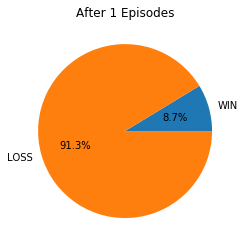

10


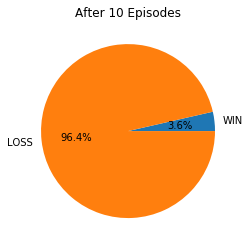

20


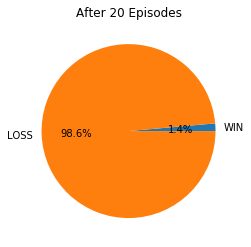

30


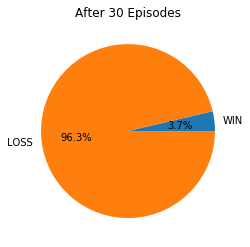

40


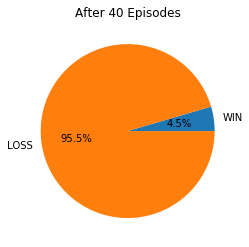

50


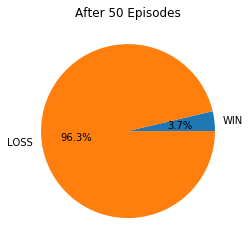

60


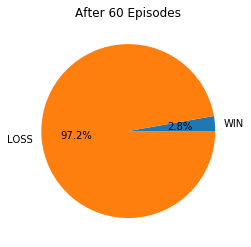

70


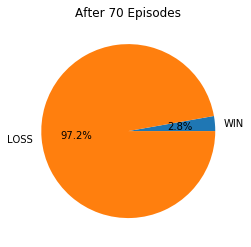

80


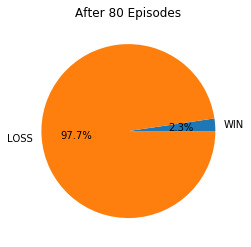

90


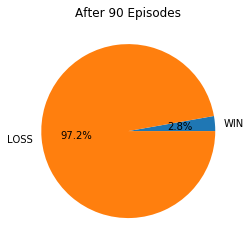

100


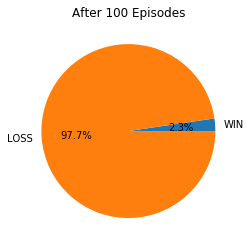

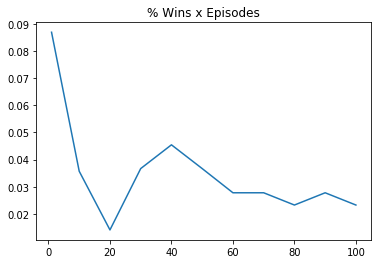

Final Win percentage to be reported is 2.33%
CPU times: user 8min 24s, sys: 27 s, total: 8min 51s
Wall time: 2min 13s


In [15]:
%%time
def main():
    ##################################################################
    ### SETUP START ##################################################
    ##################################################################
    env = gym.make("Pong-v0")
    observation = env.reset() # This gets us the image
    import random
    import matplotlib.pyplot as plt

    # hyperparameters
    episode_number = 0
    total_episodes = 2000
    batch_size = 10
    plot_batch_size = total_episodes/10
    gamma = 0.99 # discount factor for reward
    decay_rate = 0.99
    num_hidden_layer_neurons = 200
    input_dimensions = 80 * 80
    learning_rate = 1e-4

    episode_number = 0
    reward_sum = 0
    running_reward = None
#     prev_processed_observations = None
    ##################################################################
    ### WEIGHTS INITIALIZATION #######################################
    ##################################################################
    # Then, we set counters, initial values, and the initial weights in our Neural Network.
    # Weights are stored in matrices. Layer 1 of our Neural Network is a 200 x 6400 matrix representing
    # the weights for our hidden layer. For layer 1, element w1_ij represents the weight of neuron i for
    # input pixel j in layer 1.
    # Layer 2 is a 200 x 1 matrix representing the weights of the output of the hidden layer on our final output.
    # For layer 2, element w2_i represents the weights we place on the activation of neuron i in the hidden layer.
    # Initialize each layer’s weights with random numbers for now. We divide by the square root of the number
    # of the dimension size to normalize our weights.

    weights = {
        '1': np.random.randn(num_hidden_layer_neurons, input_dimensions) / np.sqrt(input_dimensions),
        '2': np.random.randn(num_hidden_layer_neurons) / np.sqrt(num_hidden_layer_neurons)
    }
    
    # To be used with rmsprop algorithm (http://sebastianruder.com/optimizing-gradient-descent/index.html#rmsprop)
    expectation_g_squared = {}
    g_dict = {}
    for layer_name in weights.keys():
        expectation_g_squared[layer_name] = np.zeros_like(weights[layer_name])
        g_dict[layer_name] = np.zeros_like(weights[layer_name])

    episode_hidden_layer_values, episode_observations, episode_gradient_log_ps, episode_rewards = [], [], [], []
    ##################################################################
    ### INITIAL SETUP ################################################
    ##################################################################
    l_win = []
    l_loss = []
    l_winsXepisodes = [] # list of sum of winns per 1000 episode
    l_episodes = [] # list of K episodes 
    sum_loss = 0
    sum_win = 0
    # The crux of our algorithm is going to live in the loop below, where we continually make a move and then learn
    # based on the results of the move. We’ll put everything in a while block for now but in reality you
    # might set up a break condition to stop the process.
    
    ##################################################################
    ### RUN EPISODES  ################################################
    ##################################################################
    while episode_number <= total_episodes:

        ##################################################################
        ### IMAGE PREPROCESS #############################################
        ##################################################################
        # The first step to our algorithm is processing the image of the game that OpenAI Gym passed us. 
        # We really don’t care about the entire image - just certain details.

        processed_observations = preprocess_observations(observation)
        ##################################################################
        ### NEURAL NETWORK ###############################################
        ##################################################################
        # Now that we’ve preprocessed the observations, let’s move on to actually sending the observations
        # through our neural net to generate the probability of telling our AI to move up. 
        # Here are the steps we’ll take:
    
        hidden_layer_values, up_probability = apply_neural_nets(processed_observations, weights)
        
        episode_observations.append(processed_observations)
        episode_hidden_layer_values.append(hidden_layer_values)
        
        ##################################################################
        ### EXECUTE ACTION ###############################################
        ##################################################################
        # Let’s continue on. Now that we have obtained a probability of going up, 
        # we need to now record the results for later learning 
        # and choose an action to tell our AI to implement.
        # Then pass the action to OpenAI Gym via env.step(action), getting the next observation (state), 
        # the reward and the Done flag indicating if the game is over for the episode.
        
        action = choose_action(up_probability)

        # carry out the chosen action
        observation, reward, done, info = env.step(action)
#         if random.random() < 0.01:
#             import pdb; pdb.set_trace()
        reward_sum += reward
        episode_rewards.append(reward)
    
        ##################################################################
        ### COMPUTE GRADIENT #############################################
        ##################################################################
        # see here: http://cs231n.github.io/neural-networks-2/#losses 
        # Learning is all about seeing the result of the action (i.e. whether or not we won the round)
        # and changing our weights accordingly. The first step to learning is asking the following question:
        # How does changing the output probability (of going up) affect my result of winning the round?
        # Mathematically, this is just the derivative of our result with respect to the outputs of our final layer.
        # We simplify this by using: dL/df = true_label(0 or 1) — predicted_label(0 or 1)
        # After one action(moving the paddle up or down), we don’t really have an idea of whether or not 
        # this was the right action. So we’re going to cheat and treat the action we end up sampling 
        # from our probability as the correct action.
        # Our predicion for this round is going to be the probability of going up we calculated. Using that, 
        # we have that ∂L/∂f can be computed by the code below.
        fake_label = 1 if action == 2 else 0
        loss_function_gradient = fake_label - up_probability
        episode_gradient_log_ps.append(loss_function_gradient)
    
        ##################################################################
        ### PROCESS END OF EPISODE  ######################################
        ##################################################################
        # OpenAI Gym provides us the handy done variable to tell us when an episode finishes (i.e. we missed 
        # the ball or our opponent missed the ball). When we notice we are done, the first thing we do is 
        #  compile all our observations and gradient calculations for the episode. 
        # This allows us to apply our learnings over all the actions in the episode.
        if done: # an episode finished
            episode_number += 1
            ##############################################################
            # COMPILE ALL OBSERVATIONS AND GRADIENT ###################### 
            ##############################################################
            # When we notice we are done, the first thing we do is compile all our observations 
            # and gradient calculations for the episode. This allows us to apply our learnings 
            # over all the actions in the episode.
            episode_hidden_layer_values = np.vstack(episode_hidden_layer_values)
            episode_observations = np.vstack(episode_observations)
            episode_gradient_log_ps = np.vstack(episode_gradient_log_ps)
            episode_rewards = np.vstack(episode_rewards)
            
            ##############################################################
            # UPDATE VALUES FOR PIE CHART WINS x LOSSES ################## 
            ##############################################################
            l_loss.append(int(sum(episode_rewards < 0))) # save number of losses per episode
            l_win.append(int(sum(episode_rewards > 0))) # save number of wins per episode
            sum_loss += float(sum(episode_rewards < 0))
            sum_win += float(sum(episode_rewards > 0))
            # Tweak the gradient of the log_ps based on the discounted rewards
            episode_gradient_log_ps_discounted = discount_with_rewards(episode_gradient_log_ps, episode_rewards, gamma)

            gradient = compute_gradient(
              episode_gradient_log_ps_discounted,
              episode_hidden_layer_values,
              episode_observations,
              weights
            )

            # Sum the gradient for use when we hit the batch size
            for layer_name in gradient:
                g_dict[layer_name] += gradient[layer_name]

            if episode_number % batch_size == 0:
                update_weights(weights, expectation_g_squared, g_dict, decay_rate, learning_rate)
            
            ##################################################################
            ### PIE CHART WINS x LOSSES ######################################
            ##################################################################
            # plot the frequency of match wins for each episode

            
            if episode_number % plot_batch_size == 0 or episode_number == 1:
                print(episode_number)
                ##################
                # plot pie chart
                ##################
                sizes = [sum_win, sum_loss]
                labels = ['WIN', 'LOSS']
                fig1, ax1 = plt.subplots()
                ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
                plt.title("After " + str(episode_number) + " Episodes")
                plt.savefig("PIE_" + str(episode_number) + " Episodes")
                plt.show()
                
                # saving the % win x episodes table
                ###################################
                l_winsXepisodes.append(float(sum_win/(sum_win+sum_loss)))
                l_episodes.append(episode_number)
                
                sum_loss = 0
                sum_win = 0
                
            episode_hidden_layer_values, episode_observations, episode_gradient_log_ps, episode_rewards = [], [], [], [] # reset values
            observation = env.reset() # reset env
            running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
            #print 'resetting env. episode reward total was %f. running mean: %f' % (reward_sum, running_reward)
            reward_sum = 0
    ############################
    # save and plot % win trend
    ############################
    df_wins = pd.DataFrame(list(zip(l_episodes, l_winsXepisodes)) , columns=["Episodes", "%Wins"])
    df_wins.to_csv('winsXepisodes.csv')
    fig1, ax1 = plt.subplots()
    ax1.plot(df_wins["Episodes"], df_wins["%Wins"])
    plt.title("% Wins x Episodes")
    plt.savefig("Wins x Episodes")
    plt.show()
    
    ############################
    # save and plot % win trend
    ############################
    my_pong_score = l_winsXepisodes[-1] * 100.0
    print("Final Win percentage to be reported is {:.2f}%".format(my_pong_score))
    return my_pong_score
    
my_pong_score = main()